In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

In [91]:
books = pd.read_csv('Books_Data_Clean.csv', sep = ',')

In [92]:
books.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [8]:
books.shape

(1070, 15)

In [10]:
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [8]:

books.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [96]:
#Rename columns
books.columns = books.columns.str.replace(' ', '')
books.head()

,index,PublishingYear,BookName,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,grosssales,publisherrevenue,saleprice,salesrank,Publisher,unitssold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [37]:
#Remove space in Column Publisher
books.rename({"Publisher ": "Publisher"}, inplace=True)

In [11]:
books.duplicated().sum()


0

In [46]:
books.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [49]:
books.tail(5)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106
1069,1069,1999.0,Tripwire,Lee Child,eng,Excellent,4.07,55251,genre fiction,316.94,0.000,2.99,1273,"Amazon Digital Services, Inc.",106


In [51]:
del books['index']

In [89]:
books.head()

,PublishingYear,BookName,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,grosssales,publisherrevenue,saleprice,salesrank,Publisher,unitssold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",nan,Novice,3.42,155903,fiction,34160.0,20496.0,4.88,1,HarperCollins Christian Publishing,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",nan,Intermediate,4.23,145267,fiction,12437.5,7462.5,1.99,2,HarperCollins Christian Publishing,6250
2,2015.0,Go Set a Watchman,Harper Lee,nan,Novice,3.31,138669,fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,nan,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,nan,Intermediate,4.04,198283,fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [60]:
#differents books genre
books.genre.unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [107]:
#replace genre fiction 
books.loc[books['genre']=='genre fiction', 'genre'] = 'fiction'

In [108]:
#verify that genre columns is modified
books.genre.unique()

array(['fiction', 'nonfiction', 'children'], dtype=object)

In [93]:
books.language_code.unique()

array(['en-US', 'eng', nan, 'spa', 'en-GB', 'fre', 'en-CA', 'nl', 'ara'],
      dtype=object)

In [94]:
books.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [109]:
#verify Publisher are duplicated or different spelling 
books.Publisher.unique()

array(['HarperCollins Publishers', 'Amazon Digital Services,  Inc.',
       'Hachette Book Group', 'Penguin Group (USA) LLC',
       'Random House LLC', 'Simon and Schuster Digital Sales Inc',
       'Macmillan', 'HarperCollins Publishing',
       'HarperCollins Christian Publishing'], dtype=object)

In [110]:
#replace the values HarperCollins Publishing and HarperCollins Publishers in column Publisher by HarperCollins Christian Publishing
books.loc[books['Publisher']=='HarperCollins Publishing', 'Publisher'] = 'HarperCollins Christian Publishing'
books.loc[books['Publisher']=='HarperCollins Publishers', 'Publisher'] = 'HarperCollins Christian Publishing'


In [111]:
#verify Publisher column
books.Publisher.unique()

array(['HarperCollins Christian Publishing',
       'Amazon Digital Services,  Inc.', 'Hachette Book Group',
       'Penguin Group (USA) LLC', 'Random House LLC',
       'Simon and Schuster Digital Sales Inc', 'Macmillan'], dtype=object)

Text(0, 0.5, 'units sold')

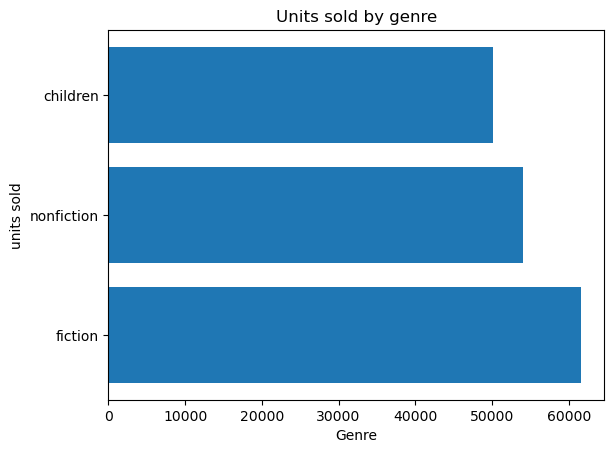

In [114]:
plt.barh(books.genre, books.unitssold)
plt.title('Units sold by genre')
plt.xlabel('Genre')
plt.ylabel('units sold')

Text(0, 0.5, 'units sold')

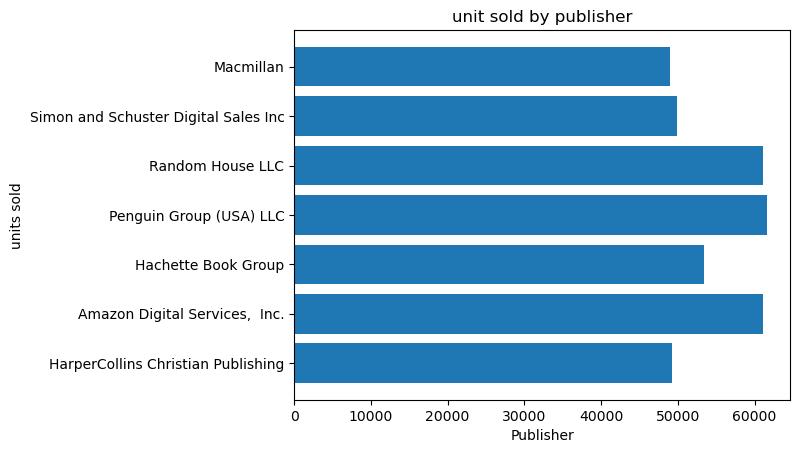

In [115]:
plt.barh(books.Publisher, books.unitssold)
plt.title('unit sold by publisher')
plt.xlabel('Publisher')
plt.ylabel('units sold')

In [75]:
books.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_11640\4217152511.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  books.corr()


,PublishingYear,Book_average_rating,Book_ratings_count,grosssales,publisherrevenue,saleprice,salesrank,unitssold
PublishingYear,1.000000,0.054553,0.000290,0.008908,0.007629,0.028626,0.016796,-0.015231
Book_average_rating,0.054553,1.000000,0.093033,-0.042240,-0.043510,0.000290,-0.020217,-0.008516
Book_ratings_count,0.000290,0.093033,1.000000,0.502120,0.401315,-0.068573,-0.835446,-0.252232
grosssales,0.008908,-0.042240,0.502120,1.000000,0.912891,0.272852,-0.442104,-0.150592
publisherrevenue,0.007629,-0.043510,0.401315,0.912891,1.000000,0.313636,-0.340574,-0.116273
saleprice,0.028626,0.000290,-0.068573,0.272852,0.313636,1.000000,0.071921,0.004248
salesrank,0.016796,-0.020217,-0.835446,-0.442104,-0.340574,0.071921,1.000000,0.211554
unitssold,-0.015231,-0.008516,-0.252232,-0.150592,-0.116273,0.004248,0.211554,1.000000
